In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

# columns = ['Title', 'Subject', 'List', 'Send Date', 'Send Weekday', 'Total Recipients', 'Successful Deliveries',
#          'Soft Bounces', 'Hard Bounces', 'Total Bounces', 'Unique Opens', 'Open Rate', 'Unique Clicks', 'Click Rate',
#          'Total Clicks', 'Unsubscribes', 'Unique Id']
#df = pd.read_csv('campaigns.csv', usecols = columns)
# df.to_csv('data.csv')

df = pd.read_csv('data.csv')

In [2]:
df.head()

,Unnamed: 0,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,Unique Opens,Open Rate,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Unique Id
0,0,Toppa @ Berkeley,Toppa Fall 2019 Recruitment 🎍,Toppa At Berkeley,"Sep 01, 2019 04:46 pm",Sunday,1,1,0,0,0,1,100.00%,0,0.00%,0,0,d6cbeef4ae
1,1,Test Email,TEST EMAIL FROM TOPPA!,Toppa At Berkeley,"Sep 02, 2019 12:08 pm",Monday,13,13,0,0,0,12,92.31%,2,15.38%,2,0,3bd5df2615
2,2,[Toppa @ Berkeley] Welcome Back & Toppa tablin...,[Toppa @ Berkeley] Welcome Back + Toppa tablin...,Toppa At Berkeley,"Sep 03, 2019 07:43 pm",Tuesday,22,22,0,0,0,22,100.00%,14,63.64%,39,0,672d213b86
3,3,Toppa Info Session Reminder,[Toppa @ Berkeley] Info Session Reminder!,Toppa At Berkeley,"Sep 06, 2019 02:49 pm",Friday,178,177,0,1,1,162,91.53%,34,19.21%,46,1,94bc01fb0f
4,4,Toppa Fall 2019 Application,[Toppa @ Berkeley] Mentee Application is Now O...,Toppa At Berkeley,"Sep 07, 2019 08:40 pm",Saturday,217,217,0,0,0,194,89.40%,61,28.11%,82,1,3fc060ae23


# Preprocessing: Dropping unwanted columns

In [3]:
# Drop the first column
df = df.drop(df.columns[[0]], axis=1)
# Drop column by name
df = df.drop(columns='Title')

In [4]:
df.head()

,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,Unique Opens,Open Rate,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Unique Id
0,Toppa Fall 2019 Recruitment 🎍,Toppa At Berkeley,"Sep 01, 2019 04:46 pm",Sunday,1,1,0,0,0,1,100.00%,0,0.00%,0,0,d6cbeef4ae
1,TEST EMAIL FROM TOPPA!,Toppa At Berkeley,"Sep 02, 2019 12:08 pm",Monday,13,13,0,0,0,12,92.31%,2,15.38%,2,0,3bd5df2615
2,[Toppa @ Berkeley] Welcome Back + Toppa tablin...,Toppa At Berkeley,"Sep 03, 2019 07:43 pm",Tuesday,22,22,0,0,0,22,100.00%,14,63.64%,39,0,672d213b86
3,[Toppa @ Berkeley] Info Session Reminder!,Toppa At Berkeley,"Sep 06, 2019 02:49 pm",Friday,178,177,0,1,1,162,91.53%,34,19.21%,46,1,94bc01fb0f
4,[Toppa @ Berkeley] Mentee Application is Now O...,Toppa At Berkeley,"Sep 07, 2019 08:40 pm",Saturday,217,217,0,0,0,194,89.40%,61,28.11%,82,1,3fc060ae23


# Visualization: Plotting the growth of email list with Bar plot

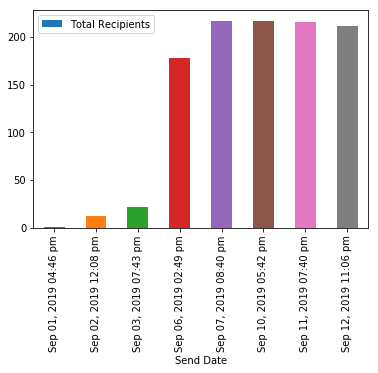

In [5]:
# Plot displaying growth of our email list
df.plot(kind='bar',x='Send Date',y='Total Recipients')
plt.show()

## Converting Dates
The date format from the above plot does not look very good. Let's convert it.

In [6]:
df['Send Date'] = df['Send Date'].str.replace('Sep', 'September')
df['Send Date'] = df['Send Date'].map(lambda x: x.rstrip(' pm'))
s = df['Send Date'][0]
s

'September 01, 2019 04:46'

In [7]:
date = datetime.strptime(s, '%B %d, %Y %I:%M')
date

datetime.datetime(2019, 9, 1, 4, 46)

In [8]:
df['Send Date'] = df['Send Date'].map(lambda x: pd.to_datetime(
    x, format='%B %d, %Y %I:%M', errors='ignore'))
df['Send Date']

0   2019-09-01 04:46:00
1   2019-09-02 00:08:00
2   2019-09-03 07:43:00
3   2019-09-06 02:49:00
4   2019-09-07 08:40:00
5   2019-09-10 05:42:00
6   2019-09-11 07:40:00
7   2019-09-12 11:06:00
Name: Send Date, dtype: datetime64[ns]

In [9]:
df['Date'] = df['Send Date'].map(lambda x: x.strftime("%Y-%m-%d"))
df['Send Time'] = df['Send Date'].map(lambda x: x.strftime("%H:%M:%S"))

In [10]:
print(df['Date'])
print(df['Send Time'])

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-06
4    2019-09-07
5    2019-09-10
6    2019-09-11
7    2019-09-12
Name: Date, dtype: object
0    04:46:00
1    00:08:00
2    07:43:00
3    02:49:00
4    08:40:00
5    05:42:00
6    07:40:00
7    11:06:00
Name: Send Time, dtype: object


# Plotting Audience Growth

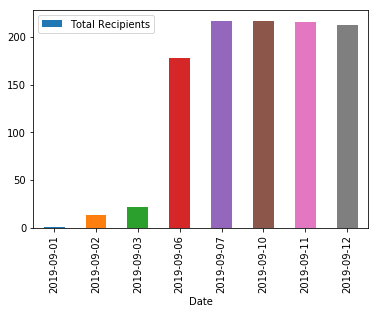

In [11]:
df.plot(kind='bar', x='Date', y='Total Recipients')
plt.show()

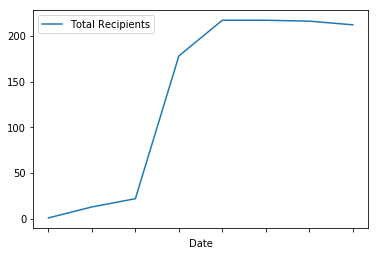

In [12]:
df.plot(x='Date', y='Total Recipients')
plt.show()

# Plotting Open Rates

In [13]:
df['Open Rate']

0    100.00%
1     92.31%
2    100.00%
3     91.53%
4     89.40%
5     83.87%
6     81.02%
7     85.38%
Name: Open Rate, dtype: object

In [14]:
df['Open Rate'] = df['Open Rate'].map(lambda x: x.rstrip('%'))
df['Open Rate'] = df['Open Rate'].astype(float)
df['Open Rate']

0    100.00
1     92.31
2    100.00
3     91.53
4     89.40
5     83.87
6     81.02
7     85.38
Name: Open Rate, dtype: float64

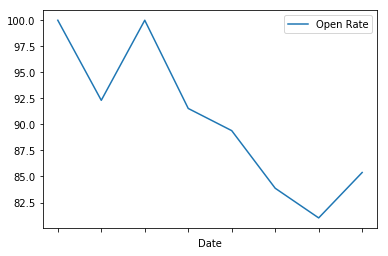

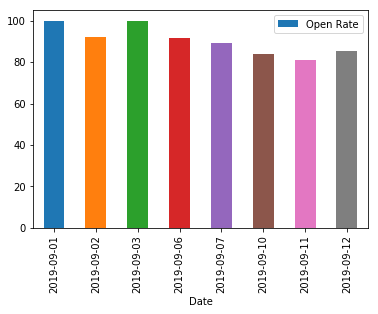

In [15]:
df.plot(kind = 'line', x = 'Date', y = 'Open Rate')
df.plot(kind = 'bar', x = 'Date', y = 'Open Rate')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


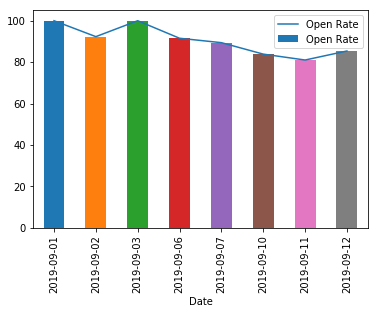

In [16]:
fig, ax = plt.subplots(1)
df.plot(x = 'Date', y = 'Open Rate', ax=ax)
df.plot(kind = 'bar', x = 'Date', y = 'Open Rate', ax=ax)
fig.show()

# Correlation Analysis: Click Rate & Open Rate

In [17]:
df['Click Rate']

0     0.00%
1    15.38%
2    63.64%
3    19.21%
4    28.11%
5    19.82%
6    11.11%
7    25.00%
Name: Click Rate, dtype: object

In [18]:
df['Click Rate'] = df['Click Rate'].map(lambda x: x.rstrip('%'))
df['Click Rate'] = df['Click Rate'].astype(float)
df['Click Rate']

0     0.00
1    15.38
2    63.64
3    19.21
4    28.11
5    19.82
6    11.11
7    25.00
Name: Click Rate, dtype: float64

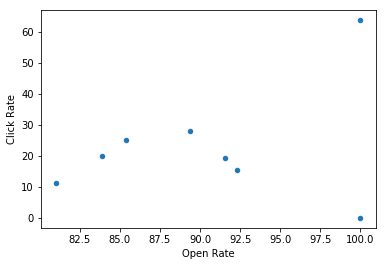

In [19]:
df.plot(kind = 'scatter', x = 'Open Rate', y = 'Click Rate')
plt.show()

# Regression on Open Rate and Click Rate

## Preparing the data & Preprocessing the data

In [20]:
X = np.array(df["Open Rate"]).reshape(-1,1)
y = np.array(df["Click Rate"]).reshape(-1,1)

In [21]:
print('X:', X)
print('y:', y)

X: [[100.  ]
 [ 92.31]
 [100.  ]
 [ 91.53]
 [ 89.4 ]
 [ 83.87]
 [ 81.02]
 [ 85.38]]
y: [[ 0.  ]
 [15.38]
 [63.64]
 [19.21]
 [28.11]
 [19.82]
 [11.11]
 [25.  ]]


## Defining Our Regression Models
### Here, I used OLS and Ridge Regressions

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


def regression(X, y, a=1):
    ols = linear_model.LinearRegression()
    ridge = linear_model.Ridge(alpha=a)

    model_ols = ols.fit(X, y)
    model_ridge = ridge.fit(X, y)

    ols_pred = model_ols.predict(X)
    ridge_pred = model_ridge.predict(X)

    # The coefficients
    print('OLS Coefficients: \n', model_ols.coef_)
    print('Ridge Coefficients: \n', model_ridge.coef_)

    # The mean squared error
    print("OLS Mean squared error: %.2f" % mean_squared_error(y, ols_pred))
    print("Ridge Mean squared error: %.2f" % mean_squared_error(y, ridge_pred))

    # Explained variance score: 1 is perfect prediction
    print('OLD Variance score: %.2f' % r2_score(y, ols_pred))
    print('Ridge Variance score: %.2f' % r2_score(y, ridge_pred))

    # Plot outputs
    plt.scatter(X, y,  color='black')
    plt.plot(X, ols_pred, color='blue', linewidth=3)
    plt.plot(X, ridge_pred, color='red', linewidth=3)
    plt.legend(["OLS", "Ridge"])

    plt.show()

OLS Coefficients: 
 [[0.77361947]]
Ridge Coefficients: 
 [[0.75189217]]
OLS Mean squared error: 278.39
Ridge Mean squared error: 278.41
OLD Variance score: 0.09
Ridge Variance score: 0.09


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


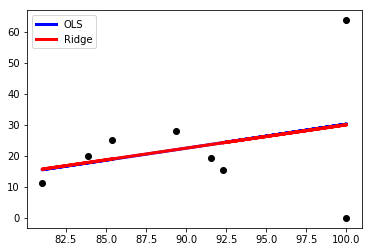

In [23]:
regression(X,y,a=10)

Our model does not seem to capture the linear relationship well.  
One reason would be the data point (100.0, 0.0), an outlier that affects the model outcome.  
Another would be the scarcity of our training data.

Solution: 
Take out the outlier

In [24]:
X = np.array(df["Open Rate"])
y = np.array(df["Click Rate"])

#Delete abnormal data
X = np.delete(X, 0).reshape(-1,1)
y = np.delete(y, 0).reshape(-1,1)

print('X:', X)
print('y:', y)

X: [[ 92.31]
 [100.  ]
 [ 91.53]
 [ 89.4 ]
 [ 83.87]
 [ 81.02]
 [ 85.38]]
y: [[15.38]
 [63.64]
 [19.21]
 [28.11]
 [19.82]
 [11.11]
 [25.  ]]


OLS Coefficients: 
 [[2.13873553]]
Ridge Coefficients: 
 [[1.51260816]]
OLS Mean squared error: 105.14
Ridge Mean squared error: 118.67
OLD Variance score: 0.60
Ridge Variance score: 0.55


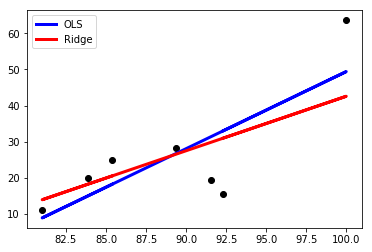

In [25]:
regression(X,y,a=100)

In [ ]:
from pandas import